# Libraries

In [1]:
import numpy as np
from numpy.random import random
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from time import time
%matplotlib inline

mpl.style.use("seaborn-poster")
mpl.rcParams['figure.dpi'] = 300

# Data

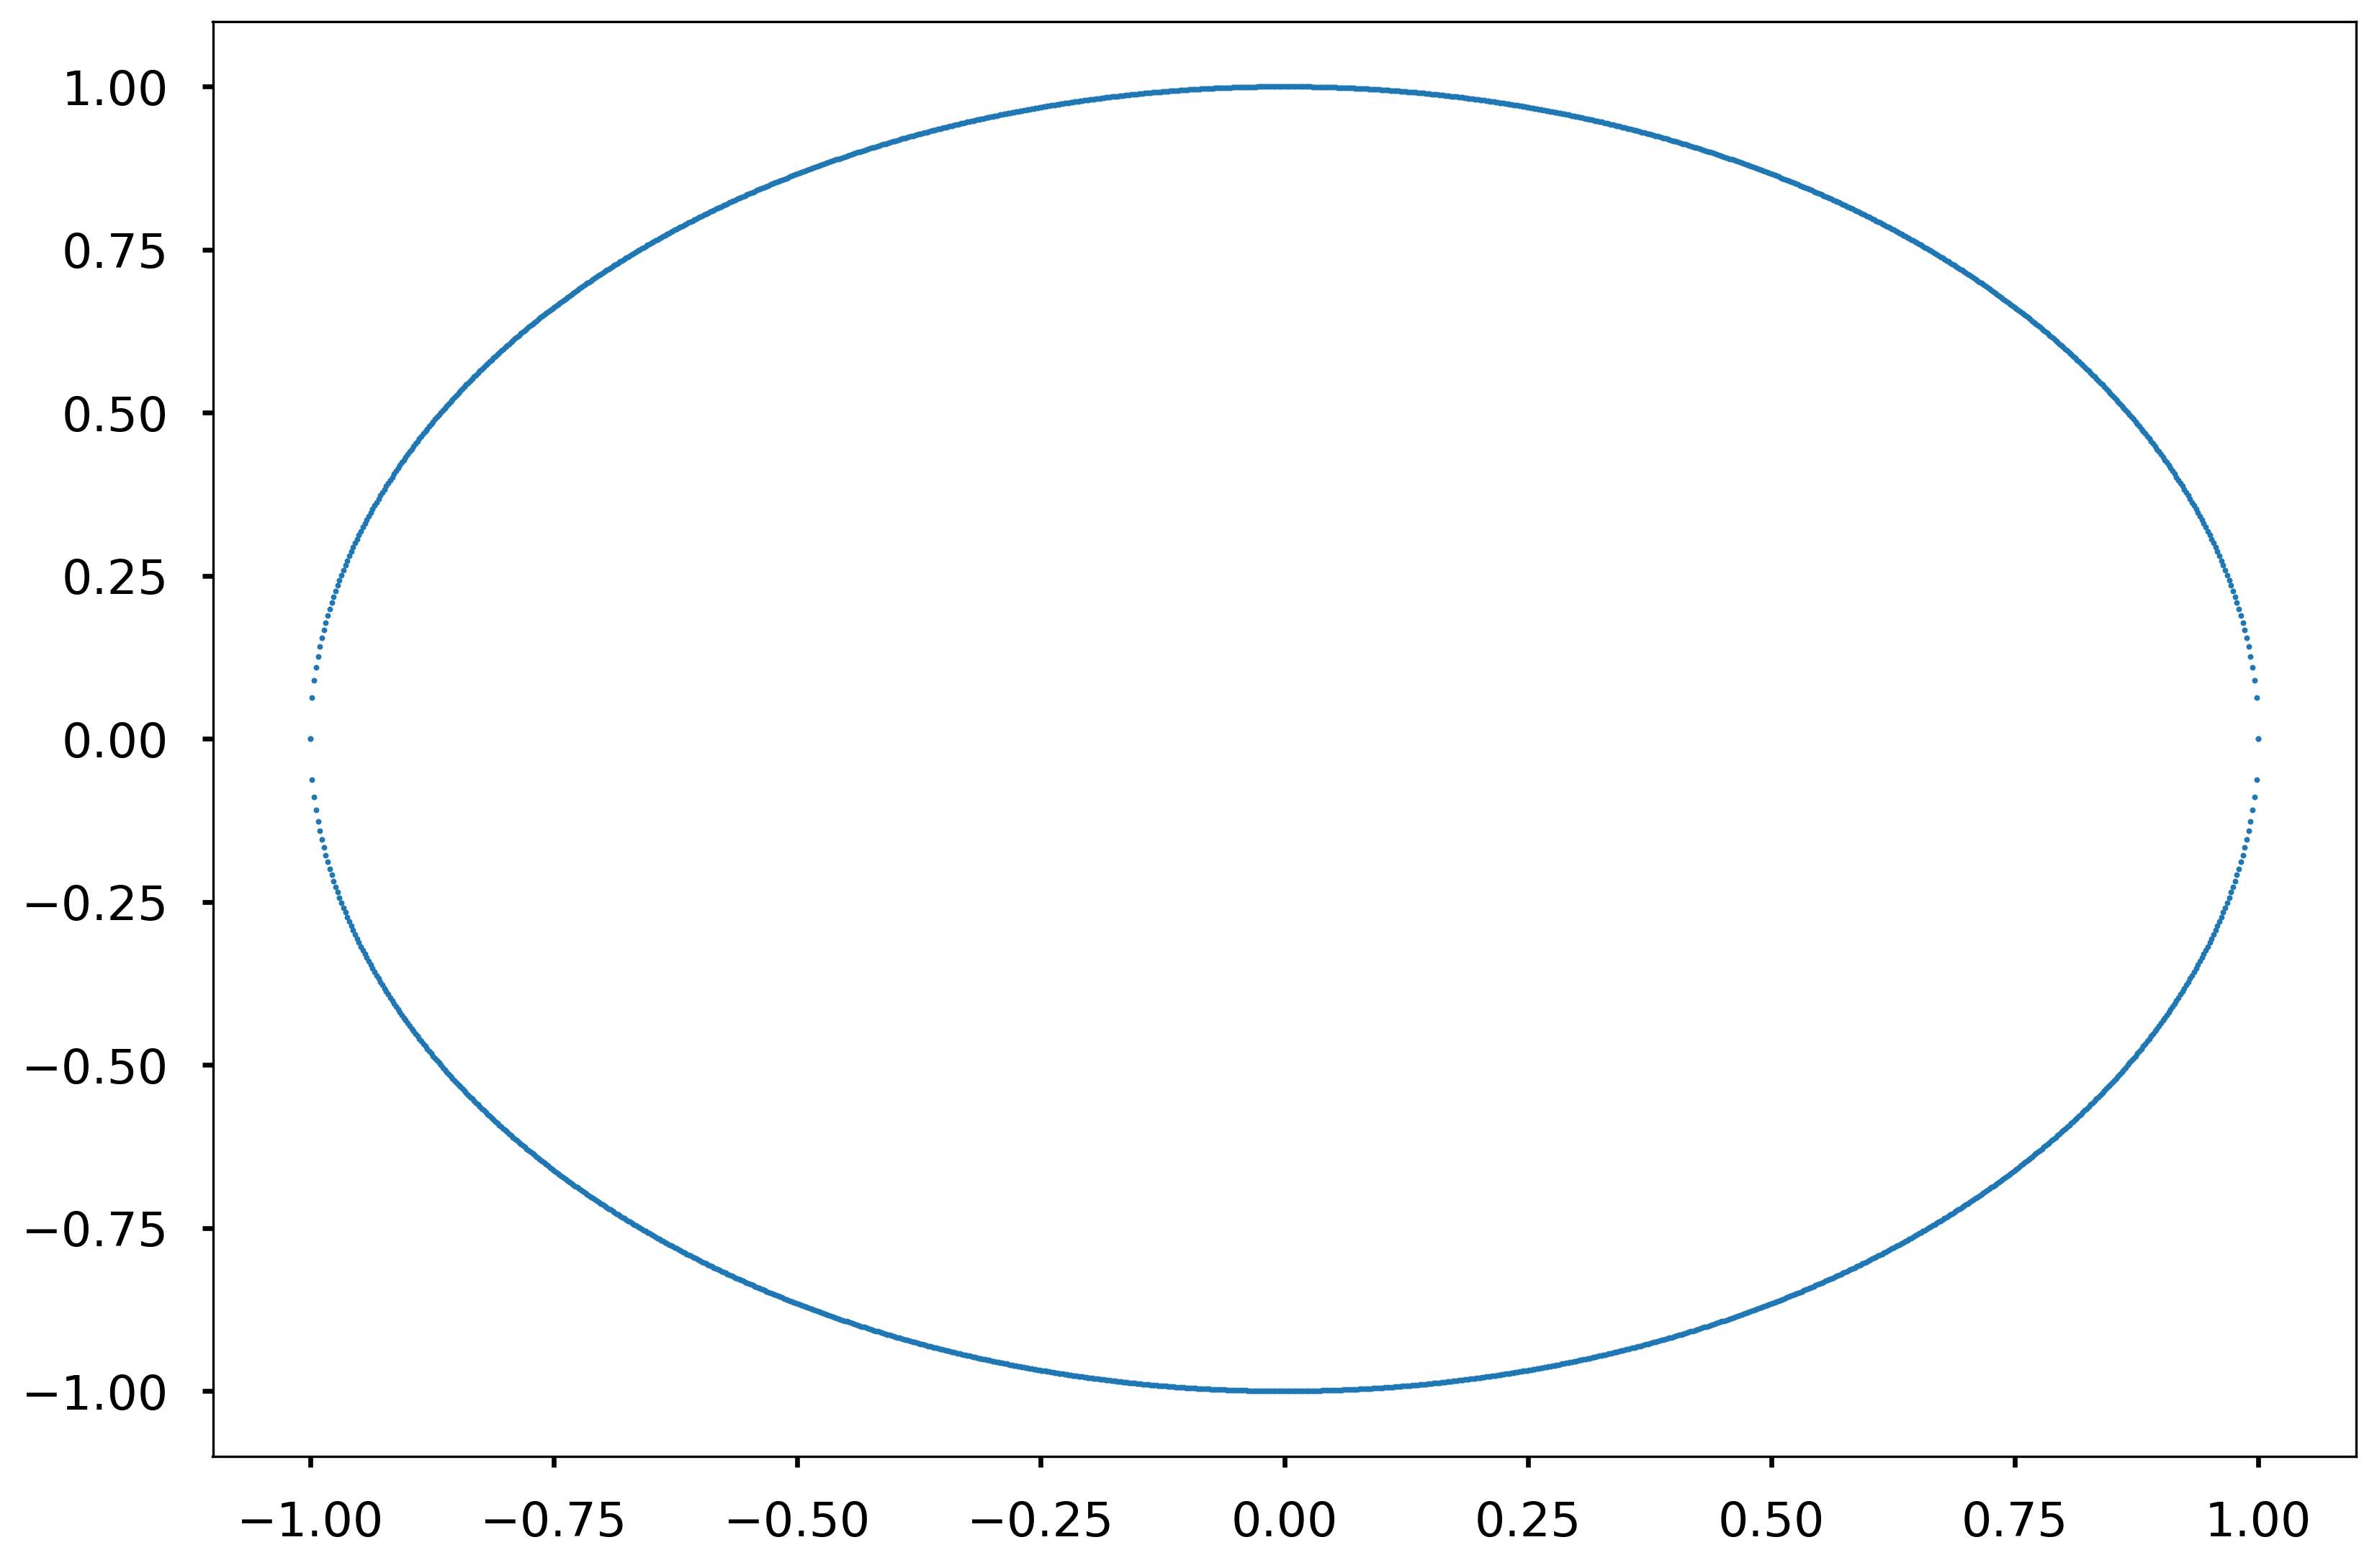

In [11]:
xpoints = np.linspace(-1,1, 1000)
y_positive = np.sqrt(np.abs(xpoints**2 -1.0))
y_negative = -y_positive

xdata = np.append(xpoints, xpoints)
ydata = np.append(y_positive,y_negative)

plt.scatter(xdata,ydata, s=2)

# Hit and Miss Integration

## First, get the area of a rectangle that inscribes the shape

In [12]:
v = xdata
q = ydata

x_min = np.min(v)
x_max = np.max(v)

y_min = np.min(q)
y_max = np.max(q)

print("Max x: ", x_max)
print("Max y: ", y_max)

print("Min x: ", x_min)
print("Min y: ", y_min)

length = x_max - x_min
height = y_max - y_min
rectangle_area =  length * height
print("Area of Rectange inscribing the shape: ", rectangle_area)

Max x:  1.0
Max y:  0.9999994989983725
Min x:  -1.0
Min y:  -0.9999994989983725
Area of Rectange inscribing the shape:  3.99999799599349


## Second, calculate the probability of selecting a random (x,y) pair and it being inside the shape

$P(x,y) = A_{shape} / A_{rectangle}$ 

$A_{shape} = P(x,y)*A_{rectangle}$

In [13]:
def in_shape(xpoint, ypoint, xarray, yarray, tol = 50):
    
    inshape = False

    ytests = []
    for idx in range(0, len(xarray)):
        
        x = xarray[idx]

        
        if x-tol<=xpoint and xpoint<=x+tol:  # In X
            ytests.append(yarray[idx])
            


    ytest_max = np.max(ytests)
    ytest_min = np.min(ytests)
    
    if ytest_min <= ypoint and ypoint <= ytest_max: # In Y
        inshape = True
        
        
    return inshape

In [23]:
ntrails = 100000
nhits = 0

x_hit = []
y_hit = []

x_miss = []
y_miss = []

t0 = time()
for i in range(0, ntrails):

    rand_x = random() * length + x_min
    rand_y = random() * height + y_min
    
    if in_shape(rand_x, rand_y, v, q, tol=0.01):
        nhits += 1
        x_hit.append(rand_x)
        y_hit.append(rand_y)
        
    else:
        x_miss.append(rand_x)
        y_miss.append(rand_y)
        
t1 = time()

        

In [24]:
time_elapsed = t1 - t0
prob = nhits / ntrails
area_shape = prob * rectangle_area
print("Time Elapsed (s): ", time_elapsed)
print("Number of Trials: ", ntrails)
print("Probability: ", prob)
print("Area of Shape: ", area_shape)


Time Elapsed (s):  67.80724382400513
Number of Trials:  100000
Probability:  0.79504
Area of Shape:  3.180158406734664


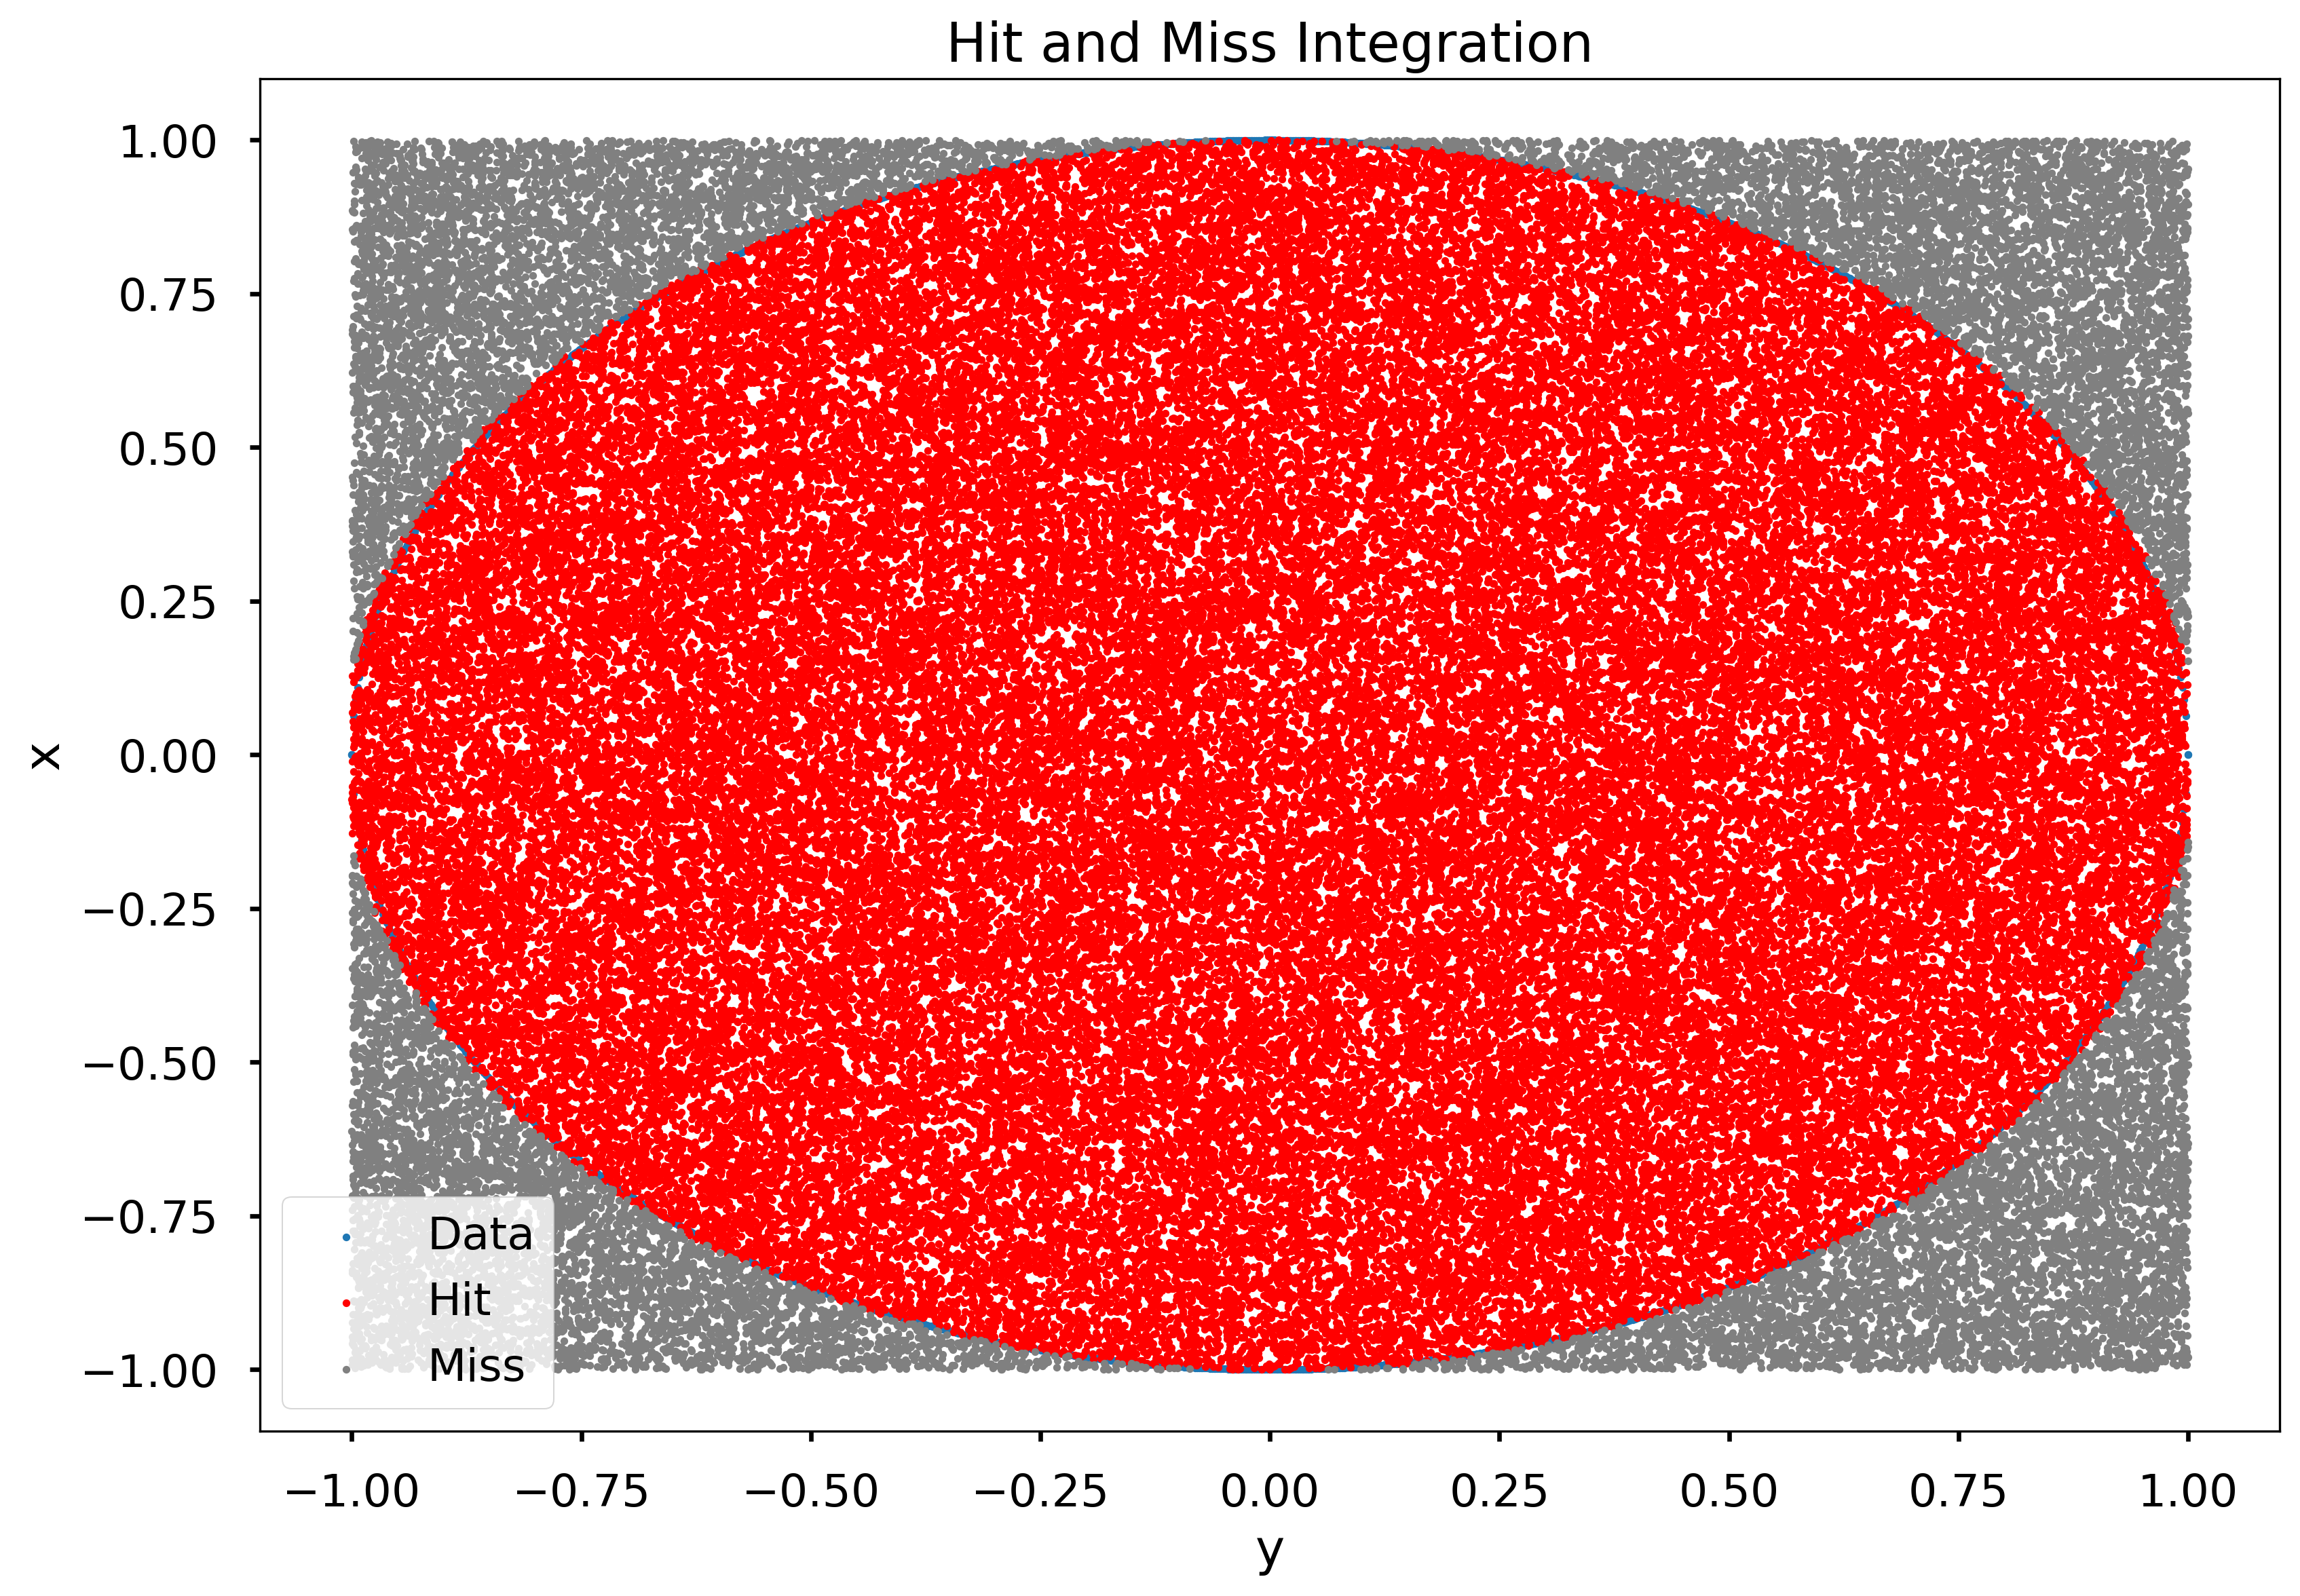

In [25]:
fig, ax = plt.subplots()

ax.scatter(xdata, ydata, s=5, label="Data")
ax.scatter(x_hit, y_hit, s=5, marker='o', color='r', label="Hit")
ax.scatter(x_miss, y_miss, s=5, marker='o', color='grey', label="Miss")
ax.legend()

ax.set_xlabel("y")
ax.set_ylabel("x")
ax.set_title("Hit and Miss Integration")

plt.savefig("circle.png")
plt.show()
